In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_excel('Train.xlsx')
test=pd.read_excel('Test.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [4]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
edition = df["Edition"].str.split(",", n = 1, expand = True)
edition

,0,1
0,Paperback,– 10 Mar 2016
1,Paperback,– 7 Nov 2012
2,Paperback,– 25 Feb 1982
3,Paperback,– 5 Oct 2017
4,Hardcover,– 10 Oct 2006
...,...,...
6232,Paperback,– 8 Aug 2018
6233,Paperback,– 21 Nov 2016
6234,Paperback,– 8 Jun 2006
6235,Paperback,– 15 Jan 2015


In [6]:
df['style'] = edition[0]

In [7]:
reviews = df["Reviews"].str.split(" ", n = 1, expand = True)
reviews

,0,1
0,4.0,out of 5 stars
1,3.9,out of 5 stars
2,4.8,out of 5 stars
3,4.1,out of 5 stars
4,5.0,out of 5 stars
...,...,...
6232,5.0,out of 5 stars
6233,3.3,out of 5 stars
6234,3.8,out of 5 stars
6235,3.5,out of 5 stars


In [8]:
df['stars'] = reviews[0]

In [9]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,style,stars
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,4.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,3.9
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,4.8
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,4.1
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,5.0


In [10]:
df.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BookCategory  6237 non-null   object 
 1   Price         6237 non-null   float64
 2   style         6237 non-null   object 
 3   stars         6237 non-null   object 
dtypes: float64(1), object(3)
memory usage: 195.0+ KB


In [12]:
df['stars'] = df['stars'].astype('float')

In [13]:
df['style'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
(Spanish)                   1
Leather Bound               1
Plastic Comb                1
(French)                    1
Perfect Paperback           1
(German)                    1
(Kannada)                   1
Product Bundle              1
Board book                  1
Library Binding             1
Name: style, dtype: int64

In [14]:
df['BookCategory'].value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [15]:
df.replace(to_replace=['Action & Adventure','Paperback','(French)','(Spanish)','(German)','(Kannada)','Perfect Paperback'],value=0,inplace=True)
df.replace(to_replace=['Crime, Thriller & Mystery','Hardcover'],value=1,inplace=True)
df.replace(to_replace=['Biographies, Diaries & True Accounts','Mass Market Paperback'],value=2,inplace=True)
df.replace(to_replace=['Language, Linguistics & Writing','Sheet music'],value=3,inplace=True)
df.replace(to_replace=['Comics & Mangas','Flexibound'],value=4,inplace=True)
df.replace(to_replace=['Romance','Cards'],value=5,inplace=True)
df.replace(to_replace=['Humour','Spiral-bound'],value=6,inplace=True)
df.replace(to_replace=['Arts, Film & Photography','Tankobon Softcover'],value=7,inplace=True)
df.replace(to_replace=['Computing, Internet & Digital Media','Loose Leaf'],value=8,inplace=True)
df.replace(to_replace=['Sports','Board book'],value=9,inplace=True)
df.replace(to_replace=['Politics','Library Binding'],value=10,inplace=True)
df.replace(to_replace=['Leather Bound'],value=11,inplace=True)
df.replace(to_replace=['Product Bundle'],value=12,inplace=True)
df.replace(to_replace=['Plastic Comb'],value=13,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BookCategory  6237 non-null   int64  
 1   Price         6237 non-null   float64
 2   style         6237 non-null   int64  
 3   stars         6237 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 195.0 KB


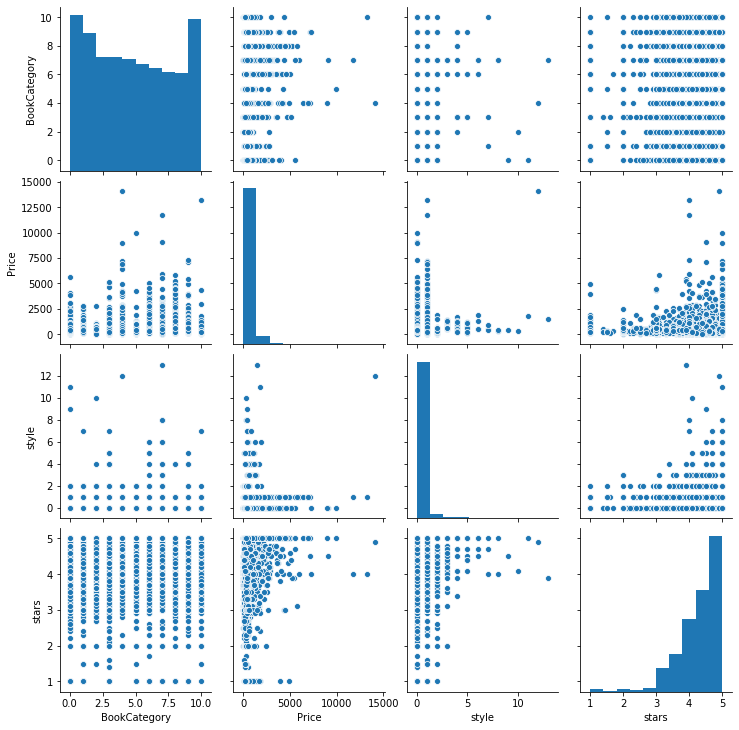

In [17]:
sns.pairplot(df)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [19]:
edit = test["Edition"].str.split(",", n = 1, expand = True)
edit

,0,1
0,Mass Market Paperback,– 1 Oct 1986
1,Paperback,"– Import, 26 Apr 2018"
2,Paperback,– 17 Mar 2011
3,Paperback,– 2016
4,Paperback,– 26 Dec 2011
...,...,...
1555,Paperback,– 14 Apr 2011
1556,Paperback,– 8 May 2013
1557,Paperback,– 6 Sep 2011
1558,Paperback,– 22 Sep 2009


In [20]:
test['style'] = edit[0]

In [21]:
views = test["Reviews"].str.split(" ", n = 1, expand = True)
views

,0,1
0,4.4,out of 5 stars
1,5.0,out of 5 stars
2,5.0,out of 5 stars
3,4.1,out of 5 stars
4,4.4,out of 5 stars
...,...,...
1555,5.0,out of 5 stars
1556,3.6,out of 5 stars
1557,4.0,out of 5 stars
1558,3.5,out of 5 stars


In [22]:
test['stars'] = views[0]

In [23]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,style,stars
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,4.4
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,5.0
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback,5.0
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,4.1
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,4.4


In [24]:
test.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre'], axis=1, inplace=True)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BookCategory  1560 non-null   object
 1   style         1560 non-null   object
 2   stars         1560 non-null   object
dtypes: object(3)
memory usage: 36.7+ KB


In [26]:
test['stars'] = test['stars'].astype('float')

In [27]:
test.replace(to_replace=['Action & Adventure','Paperback','(French)','(Spanish)','(German)','(Kannada)','Perfect Paperback','(Chinese)'],value=0,inplace=True)
test.replace(to_replace=['Crime, Thriller & Mystery','Hardcover'],value=1,inplace=True)
test.replace(to_replace=['Biographies, Diaries & True Accounts','Mass Market Paperback'],value=2,inplace=True)
test.replace(to_replace=['Language, Linguistics & Writing','Sheet music'],value=3,inplace=True)
test.replace(to_replace=['Comics & Mangas','Flexibound'],value=4,inplace=True)
test.replace(to_replace=['Romance','Cards'],value=5,inplace=True)
test.replace(to_replace=['Humour','Spiral-bound'],value=6,inplace=True)
test.replace(to_replace=['Arts, Film & Photography','Tankobon Softcover'],value=7,inplace=True)
test.replace(to_replace=['Computing, Internet & Digital Media','Loose Leaf'],value=8,inplace=True)
test.replace(to_replace=['Sports','Board book'],value=9,inplace=True)
test.replace(to_replace=['Politics','Library Binding'],value=10,inplace=True)
test.replace(to_replace=['Leather Bound'],value=11,inplace=True)
test.replace(to_replace=['Product Bundle'],value=12,inplace=True)
test.replace(to_replace=['Plastic Comb'],value=13,inplace=True)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BookCategory  1560 non-null   int64  
 1   style         1560 non-null   int64  
 2   stars         1560 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 36.7 KB


In [29]:
X = df.drop(['Price'], axis=1).values
y = df['Price'].values

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
print(f"Multiple Linear Regression coeff: {regressor.coef_}")
print(f"Multiple Linear Regression Constant: {regressor.intercept_}")

Multiple Linear Regression coeff: [148.86964252 124.69877266  62.88130045]
Multiple Linear Regression Constant: 561.6871776780001


In [35]:
y_predict=regressor.predict(X_test)

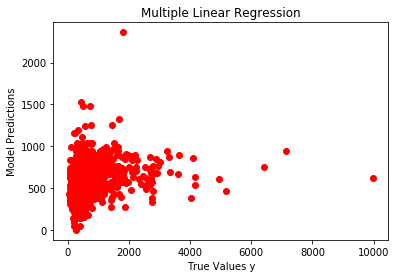

In [36]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [37]:
n=len(X_test)
n

1560

In [38]:
k=X_test.shape[1]
k

3

In [39]:
r2=r2_score(y_test, y_predict)
r2

0.0637260268779144

In [40]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.06192087140274338

In [41]:
# Ridge 
regressor_ridge=Ridge(alpha=50)
regressor_ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [42]:
print(f'Coeff:{regressor_ridge.coef_}')
print(f'Constant:{regressor_ridge.intercept_}')

Coeff:[147.35356751 123.43952534  62.29726416]
Constant:561.6871776780001


In [43]:
y_predict=regressor_ridge.predict(X_test)

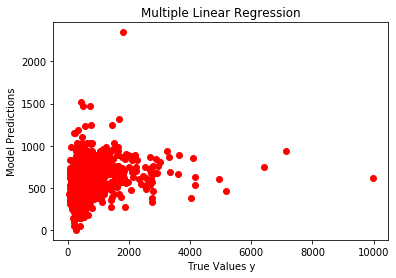

In [44]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [45]:
r2=r2_score(y_test, y_predict)
r2

0.06409766326032051

In [46]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.06229322430773765

In [47]:
mean_absolute_error(y_test, y_predict)

337.4428448705261

In [48]:
# Lasso
regressor_lasso=Lasso(alpha=500)
regressor_lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [49]:
print(f'Coeff:{regressor_lasso.coef_}')
print(f'Constant:{regressor_lasso.intercept_}')

Coeff:[0. 0. 0.]
Constant:561.6871776779988


In [50]:
y_predict=regressor_lasso.predict(X_test)

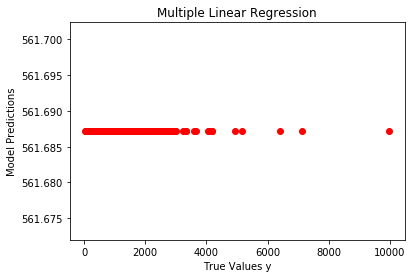

In [51]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [52]:
r2=r2_score(y_test, y_predict)
r2

-3.7714119327736384e-05

In [53]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

-0.00196580739847807

In [54]:
import xgboost as xgb

In [55]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [56]:
model = xgb.XGBClassifier()

In [57]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_predict=model.predict(X_test)

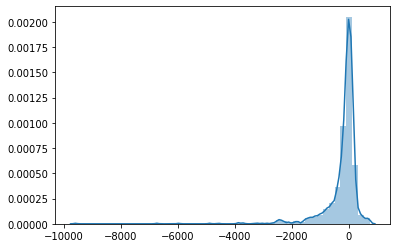

In [59]:
sns.distplot((y_predict-y_test))

In [60]:
r2=r2_score(y_test, y_predict)
r2

-0.09501309464214547

In [61]:
dl = Sequential()
dl.add(Dense(3, activation='relu'))
dl.add(Dense(3, activation='relu'))
dl.add(Dense(3, activation='relu'))
dl.add(Dense(3, activation='relu'))
dl.add(Dense(1))
dl.compile(optimizer='adam', loss='mse')

In [62]:
dl.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=400, batch_size=128)

Train on 4677 samples, validate on 1560 samples
Epoch 1/400
4677/4677 [==============================] - 4s 831us/sample - loss: 814842.1619 - val_loss: 717841.6628
Epoch 2/400
4677/4677 [==============================] - 0s 22us/sample - loss: 814752.2181 - val_loss: 717771.4410
Epoch 3/400
4677/4677 [==============================] - 0s 21us/sample - loss: 814674.6661 - val_loss: 717690.4933
Epoch 4/400
4677/4677 [==============================] - 0s 21us/sample - loss: 814584.9994 - val_loss: 717594.1080
Epoch 5/400
4677/4677 [==============================] - 0s 21us/sample - loss: 814479.5983 - val_loss: 717483.8875
Epoch 6/400
4677/4677 [==============================] - 0s 22us/sample - loss: 814359.6982 - val_loss: 717356.2692
Epoch 7/400
4677/4677 [==============================] - 0s 20us/sample - loss: 814223.2479 - val_loss: 717213.6051
Epoch 8/400
4677/4677 [==============================] - 0s 22us/sample - loss: 814071.1375 - val_loss: 717055.5907
Epoch 9/400
4677/4677 [

4677/4677 [==============================] - 0s 20us/sample - loss: 453264.0043 - val_loss: 383476.3564
Epoch 71/400
4677/4677 [==============================] - 0s 20us/sample - loss: 453378.9268 - val_loss: 383109.6590
Epoch 72/400
4677/4677 [==============================] - 0s 21us/sample - loss: 453151.1553 - val_loss: 383579.2256
Epoch 73/400
4677/4677 [==============================] - 0s 20us/sample - loss: 453273.1407 - val_loss: 383449.4176
Epoch 74/400
4677/4677 [==============================] - 0s 19us/sample - loss: 453209.0292 - val_loss: 383405.0112
Epoch 75/400
4677/4677 [==============================] - 0s 21us/sample - loss: 453234.5903 - val_loss: 383341.4599
Epoch 76/400
4677/4677 [==============================] - 0s 21us/sample - loss: 453076.1740 - val_loss: 383074.8516
Epoch 77/400
4677/4677 [==============================] - 0s 20us/sample - loss: 453117.5008 - val_loss: 382908.6138
Epoch 78/400
4677/4677 [==============================] - 0s 22us/sample - lo

Epoch 140/400
4677/4677 [==============================] - 0s 21us/sample - loss: 452030.9260 - val_loss: 382017.6676
Epoch 141/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451906.9904 - val_loss: 382280.5160
Epoch 142/400
4677/4677 [==============================] - 0s 21us/sample - loss: 452030.2460 - val_loss: 382349.4474
Epoch 143/400
4677/4677 [==============================] - 0s 21us/sample - loss: 452000.6376 - val_loss: 382291.4535
Epoch 144/400
4677/4677 [==============================] - 0s 20us/sample - loss: 452088.2035 - val_loss: 381957.8907
Epoch 145/400
4677/4677 [==============================] - 0s 19us/sample - loss: 451955.2441 - val_loss: 382293.8968
Epoch 146/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451927.9311 - val_loss: 382188.1311
Epoch 147/400
4677/4677 [==============================] - 0s 20us/sample - loss: 452018.6622 - val_loss: 382189.9256
Epoch 148/400
4677/4677 [==============================]

4677/4677 [==============================] - 0s 21us/sample - loss: 451698.4423 - val_loss: 382188.2478
Epoch 210/400
4677/4677 [==============================] - 0s 19us/sample - loss: 451745.8349 - val_loss: 382178.9407
Epoch 211/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451795.0419 - val_loss: 382027.5170
Epoch 212/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451824.9800 - val_loss: 382260.5740
Epoch 213/400
4677/4677 [==============================] - 0s 21us/sample - loss: 451710.6116 - val_loss: 382127.0298
Epoch 214/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451701.3311 - val_loss: 382208.0189
Epoch 215/400
4677/4677 [==============================] - 0s 19us/sample - loss: 451678.8049 - val_loss: 382156.0933
Epoch 216/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451712.7819 - val_loss: 382125.3138
Epoch 217/400
4677/4677 [==============================] - 0s 20us/sam

4677/4677 [==============================] - 0s 20us/sample - loss: 451800.8306 - val_loss: 382161.6939
Epoch 279/400
4677/4677 [==============================] - 0s 22us/sample - loss: 451713.1240 - val_loss: 382166.7141
Epoch 280/400
4677/4677 [==============================] - 0s 19us/sample - loss: 451646.5241 - val_loss: 382314.7769
Epoch 281/400
4677/4677 [==============================] - 0s 21us/sample - loss: 451749.5236 - val_loss: 382262.0003
Epoch 282/400
4677/4677 [==============================] - 0s 19us/sample - loss: 451649.2168 - val_loss: 382188.9337
Epoch 283/400
4677/4677 [==============================] - 0s 21us/sample - loss: 451764.0870 - val_loss: 382193.5971
Epoch 284/400
4677/4677 [==============================] - 0s 22us/sample - loss: 451652.0171 - val_loss: 382275.6756
Epoch 285/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451635.4347 - val_loss: 382246.4689
Epoch 286/400
4677/4677 [==============================] - 0s 22us/sam

4677/4677 [==============================] - 0s 20us/sample - loss: 451655.2776 - val_loss: 382330.5859
Epoch 348/400
4677/4677 [==============================] - 0s 21us/sample - loss: 451621.7231 - val_loss: 382289.8606
Epoch 349/400
4677/4677 [==============================] - 0s 21us/sample - loss: 451624.5514 - val_loss: 382236.6875
Epoch 350/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451648.5450 - val_loss: 382128.5843
Epoch 351/400
4677/4677 [==============================] - 0s 19us/sample - loss: 451690.4106 - val_loss: 382373.9426
Epoch 352/400
4677/4677 [==============================] - 0s 21us/sample - loss: 451744.9867 - val_loss: 382093.7997
Epoch 353/400
4677/4677 [==============================] - 0s 23us/sample - loss: 451642.1825 - val_loss: 382368.8821
Epoch 354/400
4677/4677 [==============================] - 0s 20us/sample - loss: 451653.8959 - val_loss: 382416.6769
Epoch 355/400
4677/4677 [==============================] - 0s 25us/sam

In [63]:
y_predict = dl.predict(X_test)

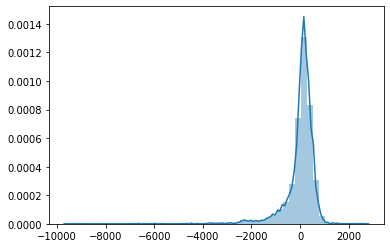

In [64]:
sns.distplot((y_predict-y_test))

In [65]:
r2=r2_score(y_test, y_predict)
r2

0.06027859479769426

In [66]:
mean_absolute_error(y_test, y_predict)

336.8702356403058

In [67]:
#y_predict=model.predict(test)

In [68]:
#y_predict.shape

In [69]:
#y_predict

In [70]:
#predict=pd.DataFrame(data=y_predict)

In [71]:
#predict.head()

In [72]:
#predict.to_csv('solution1.csv',index=False)